In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, auc, roc_curve
import warnings
warnings.filterwarnings('ignore')

## Importing and merging Train data

In [2]:
data1 = pd.read_csv('Insurance_Claim_Info_data.csv')
data1

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools
...,...,...,...,...,...,...,...
34105,5CFGWQ6IR5,AGR,Agra,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools
34106,QQ6EAWA4Q5,LKO,Lucknow,Partnership Firm,Property Damage,In Transit,Misc. Electronic Items
34107,X1J58PT1J5,HYD,Hyderabad,One Person Company,Property Damage,In Transit,Misc. Electronic Items
34108,AGOXXE8KII,MAA,Chennai,Sole Proprietorship,Property Damage,Warehouse,Pumps and Motors


In [3]:
data2 = pd.read_csv('Insurance_Date_data.csv')
data2

,Claim Number,Incident Date,Date Received
0,BCHKRDM32K,21-10-2007,31-10-2007
1,B3GPD5IZQW,26-05-2006,14-06-2006
2,EB757CV6XW,18-01-2004,10-02-2004
3,SP0Z0Q95OV,28-04-2004,06-05-2004
4,VKZUK7J3KK,04-11-2007,14-11-2007
...,...,...,...
34105,AF9GJPNKEX,04-11-2004,18-11-2004
34106,IB6C791V95,23-12-2005,23-02-2006
34107,PGEDMDDHC2,07-09-2007,11-09-2007
34108,MNSM4JN71E,05-12-2004,28-12-2004


In [4]:
data3 = pd.read_csv('Insurance_Result_data.csv')
data3

,Claim Number,Claim Amount,Close Amount,Disposition
0,Y5VA9KOE89,100.00,0.00,Deny
1,P51DOJLR8W,199.99,0.00,Deny
2,OUUZFP7EFL,410.00,59.85,Settle
3,CGP3L1CCP2,240.00,0.00,Deny
4,JDFLPD7J9Z,11.36,11.36,Approve in Full
...,...,...,...,...
34105,OYT2XKKCG7,400.00,0.00,Deny
34106,0WTU4L3YXH,380.80,142.00,Settle
34107,X9MZQW0X3Q,28.95,28.95,Approve in Full
34108,ITF3RPFW6L,75.15,75.15,Approve in Full


In [5]:
# merging datasets
# using common feature between datasets
# since 'Claim Number' is the common feature/column in all 3 datasets

data = pd.merge(data1,data2, on='Claim Number') 
data = pd.merge(data,data3, on='Claim Number')

data

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,25-05-2007,06-07-2007,490.00,0.00,Deny
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,17-09-2006,27-09-2006,300.00,150.00,Settle
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,12-06-2006,17-07-2006,83.98,83.98,Approve in Full
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,13-11-2005,05-12-2005,507.88,0.00,Deny
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,28-07-2008,12-08-2008,83.46,41.73,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...
34105,5CFGWQ6IR5,AGR,Agra,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools,19-12-2005,21-03-2006,238.00,115.60,Settle
34106,QQ6EAWA4Q5,LKO,Lucknow,Partnership Firm,Property Damage,In Transit,Misc. Electronic Items,08-01-2007,16-01-2007,7.00,0.00,Deny
34107,X1J58PT1J5,HYD,Hyderabad,One Person Company,Property Damage,In Transit,Misc. Electronic Items,19-09-2005,18-10-2005,166.00,70.00,Settle
34108,AGOXXE8KII,MAA,Chennai,Sole Proprietorship,Property Damage,Warehouse,Pumps and Motors,14-04-2009,09-09-2009,450.00,280.00,Settle


## Importing test data

In [6]:
test = pd.read_csv('test_data.csv')
test

,Claim Number,Incident Date,Date Received,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured
0,6EYB31JGFR,21-09-2006,26-12-2006,PNQ,Pune,One Person Company,Property Loss,In Transit,Inventory - Finished Goods
1,HJLRXONE3R,15-01-2009,11-02-2009,PNQ,Pune,Limited Liability Parterneship (LLP),Property Loss,In Transit,Fixtures
2,IUOV99JA22,17-08-2005,01-09-2005,AMD,Ahmedabad,Private Limited Company,Property Loss,Warehouse,Inventory - Raw Material
3,BGOUHQ2LKK,15-02-2005,01-06-2005,DEL,Delhi,One Person Company,Property Damage,In Transit,Inventory - Finished Goods
4,HDCG60QET1,17-03-2003,01-04-2003,PNQ,Pune,Private Limited Company,Property Damage,In Transit,Misc. Electronic Items
...,...,...,...,...,...,...,...,...,...
3786,IMQYY73AOP,30-07-2007,21-08-2007,CCU,Kolkata,Private Limited Company,Property Loss,Warehouse,Cameras and other Misc. Security Equipment
3787,2AR1OGIMH4,21-08-2004,09-09-2004,NGP,Nagpur,Sole Proprietorship,Property Loss,In Transit,"Property, Plant, and Equipment (PPE) Parts"
3788,SB4IET2MO5,13-05-2005,02-06-2005,LKO,Lucknow,Joint-Venture Company,Property Loss,Warehouse,"Heating, ventilation, and air conditioning (HV..."
3789,3IBWXQK04L,11-04-2004,04-05-2004,BOM,Mumbai,One Person Company,Property Damage,In Transit,Misc. Electronic Items


## EDA

In [7]:
# to check the datatype of all columns
data.dtypes

Claim Number        object
City Code           object
City                object
Enterprise Type     object
Claim Type          object
Claim Site          object
Product Insured     object
Incident Date       object
Date Received       object
Claim Amount       float64
Close Amount       float64
Disposition         object
dtype: object

In [8]:
data['Incident Date'] = pd.to_datetime(data['Incident Date'])
data['Date Received'] = pd.to_datetime(data['Date Received'])

In [9]:
# keeping the data with stated time period only
data = data[(data['Incident Date'] >= '2002-01-01') & (data['Incident Date'] <= '2009-12-31')]
data = data[(data['Date Received'] >= '2002-01-01') & (data['Date Received'] <= '2009-12-31')]
data

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-06-07,490.00,0.00,Deny
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,2006-12-06,2006-07-17,83.98,83.98,Approve in Full
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,2005-11-13,2005-05-12,507.88,0.00,Deny
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-12-08,83.46,41.73,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...
34105,5CFGWQ6IR5,AGR,Agra,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools,2005-12-19,2006-03-21,238.00,115.60,Settle
34106,QQ6EAWA4Q5,LKO,Lucknow,Partnership Firm,Property Damage,In Transit,Misc. Electronic Items,2007-08-01,2007-01-16,7.00,0.00,Deny
34107,X1J58PT1J5,HYD,Hyderabad,One Person Company,Property Damage,In Transit,Misc. Electronic Items,2005-09-19,2005-10-18,166.00,70.00,Settle
34108,AGOXXE8KII,MAA,Chennai,Sole Proprietorship,Property Damage,Warehouse,Pumps and Motors,2009-04-14,2009-09-09,450.00,280.00,Settle


In [10]:
# only taking data where incident date is before the received date
data = data[data['Incident Date'] <= data['Date Received']]
data

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-06-07,490.00,0.00,Deny
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-12-08,83.46,41.73,Settle
5,IXZ4B1B9NO,MAA,Chennai,Private Limited Company,Property Loss,In Transit,Misc. Engineering Tools,2004-09-21,2004-11-16,52.49,52.49,Approve in Full
6,FB07DWHGHF,BDQ,Vadodara,Joint-Venture Company,Property Damage,In Transit,Inventory - Raw Material,2005-05-18,2005-07-06,24.50,0.00,Deny
...,...,...,...,...,...,...,...,...,...,...,...,...
34104,6IIY7YEFT7,PNQ,Pune,Limited Liability Parterneship (LLP),Property Loss,In Transit,Cameras and other Misc. Security Equipment,2008-06-02,2008-12-02,312.93,0.00,Deny
34105,5CFGWQ6IR5,AGR,Agra,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools,2005-12-19,2006-03-21,238.00,115.60,Settle
34107,X1J58PT1J5,HYD,Hyderabad,One Person Company,Property Damage,In Transit,Misc. Electronic Items,2005-09-19,2005-10-18,166.00,70.00,Settle
34108,AGOXXE8KII,MAA,Chennai,Sole Proprietorship,Property Damage,Warehouse,Pumps and Motors,2009-04-14,2009-09-09,450.00,280.00,Settle


In [11]:
# creating a new column for % of claim received
data['Claim Received %'] = round(((data['Close Amount']/data['Claim Amount'])*100),2)
data.head()

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition,Claim Received %
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-06-07,490.00,0.00,Deny,0.0
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle,50.0
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-12-08,83.46,41.73,Settle,50.0
5,IXZ4B1B9NO,MAA,Chennai,Private Limited Company,Property Loss,In Transit,Misc. Engineering Tools,2004-09-21,2004-11-16,52.49,52.49,Approve in Full,100.0
6,FB07DWHGHF,BDQ,Vadodara,Joint-Venture Company,Property Damage,In Transit,Inventory - Raw Material,2005-05-18,2005-07-06,24.50,0.00,Deny,0.0


In [12]:
# data with only 100% or less claim received
data = data[data['Claim Received %']<=100]
data.shape

(24920, 13)

In [13]:
# average % of claims received when the claim is 'Settled'

# creating a dataframe with just settled claims
settled = data[data['Disposition']=='Settle']

avg_claim = settled['Claim Received %'].mean()

print(f'Average % of claims received when the claim is Settled : {avg_claim}')

Average % of claims received when the claim is Settled : 50.10526569118213


In [14]:
# creating a new column with Reporting delay
data['Reporting Delay'] = (data['Date Received'] - data['Incident Date']).dt.days
data.head()

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition,Claim Received %,Reporting Delay
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-06-07,490.00,0.00,Deny,0.0,13
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle,50.0,10
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-12-08,83.46,41.73,Settle,50.0,133
5,IXZ4B1B9NO,MAA,Chennai,Private Limited Company,Property Loss,In Transit,Misc. Engineering Tools,2004-09-21,2004-11-16,52.49,52.49,Approve in Full,100.0,56
6,FB07DWHGHF,BDQ,Vadodara,Joint-Venture Company,Property Damage,In Transit,Inventory - Raw Material,2005-05-18,2005-07-06,24.50,0.00,Deny,0.0,49


In [15]:
# 'Product' has the highest delay in Reporting (In days) 
# grouping the product with the reporting delay by using average of each product
product_delay = data.groupby('Product Insured')['Reporting Delay'].mean().sort_values(ascending=False)

print('The product that has the highest delay in Reporting:')
print(product_delay.head(1))

The product that has the highest delay in Reporting:
Product Insured
Misc. Electronic Items    103.78242
Name: Reporting Delay, dtype: float64


In [16]:
# percentage of each disposition value
data['Disposition'].value_counts(normalize=True)

Deny               0.527608
Approve in Full    0.263965
Settle             0.208427
Name: Disposition, dtype: float64

In [17]:
# the least and most days it took to receive the claim request
min_days = data['Reporting Delay'].min()
max_days = data['Reporting Delay'].max()
print(f'The least number of days it took to receive the claim request is {min_days} days')
print(f'The most number of days it took to receive the claim request is {max_days} days')

The least number of days it took to receive the claim request is 0 days
The most number of days it took to receive the claim request is 2118 days


In [18]:
# information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24920 entries, 0 to 34109
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Claim Number      24920 non-null  object        
 1   City Code         24920 non-null  object        
 2   City              24920 non-null  object        
 3   Enterprise Type   24920 non-null  object        
 4   Claim Type        24920 non-null  object        
 5   Claim Site        24920 non-null  object        
 6   Product Insured   24920 non-null  object        
 7   Incident Date     24920 non-null  datetime64[ns]
 8   Date Received     24920 non-null  datetime64[ns]
 9   Claim Amount      24920 non-null  float64       
 10  Close Amount      24920 non-null  float64       
 11  Disposition       24920 non-null  object        
 12  Claim Received %  24920 non-null  float64       
 13  Reporting Delay   24920 non-null  int64         
dtypes: datetime64[ns](2), 

In [19]:
# checking for duplicates
data.duplicated().sum()

0

In [20]:
# description of all column
data.describe(include='all')

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition,Claim Received %,Reporting Delay
count,24920,24920,24920,24920,24920,24920,24920,24920,24920,24920.000000,24920.000000,24920,24920.000000,24920.000000
unique,24920,23,23,13,2,3,13,2582,1701,NaN,NaN,3,NaN,NaN
top,DQW1NZO0PL,BOM,Mumbai,Sole Proprietorship,Property Loss,In Transit,Inventory - Raw Material,2004-03-21 00:00:00,2004-04-21 00:00:00,NaN,NaN,Deny,NaN,NaN
freq,1,1884,1884,4569,15495,21030,5935,32,161,NaN,NaN,13148,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002-01-07 00:00:00,2002-06-12 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-12-23 00:00:00,2009-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,727.815649,98.420631,NaN,37.507323,96.885353
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8782.064972,345.542273,NaN,43.481548,110.697506
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,0.000000,NaN,0.000000,22.000000


In [21]:
# checking for missing values
data.isnull().sum()

Claim Number        0
City Code           0
City                0
Enterprise Type     0
Claim Type          0
Claim Site          0
Product Insured     0
Incident Date       0
Date Received       0
Claim Amount        0
Close Amount        0
Disposition         0
Claim Received %    0
Reporting Delay     0
dtype: int64

In [22]:
# checking for other form of missing values by checking each columns unique values
for i in data.columns:
    print(len(data[i].unique()),i,data[i].unique(),'\n')

24920 Claim Number ['DQW1NZO0PL' 'JS5GAPRN5B' 'UJOFDC41EL' ... 'X1J58PT1J5' 'AGOXXE8KII'
 'WT5RH23GPC'] 

23 City Code ['NSK' 'BOM' 'DEL' 'MAA' 'BDQ' 'BLR' 'AMD' 'LKO' 'PAT' 'PNQ' 'CJB' 'JAI'
 'KNU' 'HYD' 'IDR' 'ATQ' 'THN' 'NGP' 'CCU' 'AGR' 'BHO' 'VSK' 'STV'] 

23 City ['Nashik' 'Mumbai' 'Delhi' 'Chennai' 'Vadodara' 'Bangalore' 'Ahmedabad'
 'Lucknow' 'Patna' 'Pune' 'Coimbatore' 'Jaipur' 'Kanpur' 'Hyderabad'
 'Indore' 'Amritsar' 'Thane' 'Nagpur' 'Kolkata' 'Agra' 'Bhopal'
 'Visakhapatnam' 'Surat'] 

13 Enterprise Type ['Public Limited Company' 'One Person Company' 'Private Limited Company'
 'Joint-Venture Company' 'Foreign Subsidary' 'Partnership Firm'
 'Sole Proprietorship' 'Non-Profit Organization (NPO)'
 'Private Ltd. MSME - Small' 'Private Ltd. MSME - Micro'
 'Private Ltd. MSME - Medium' 'Cooperative Society'
 'Limited Liability Parterneship (LLP)'] 

2 Claim Type ['Property Loss' 'Property Damage'] 

3 Claim Site ['In Transit' 'Warehouse' 'Other'] 

13 Product Insured ['Inventory - 

In [23]:
# since Claim Number is a column with unique values
# it is better to drop 'Claim Number'
data.drop('Claim Number', axis=1, inplace=True)

In [24]:
# there is no need to have both City and City Code
# City is more understandable than City Code
# dropping City Code
data.drop('City Code',axis=1, inplace=True)

In [25]:
# shape of data after dropping 'Claim Number' and 'City Code'
data.shape

(24920, 12)

In [26]:
test.drop('Claim Number', axis=1, inplace=True)
test.drop('City Code',axis=1, inplace=True)
test.head()

,Incident Date,Date Received,City,Enterprise Type,Claim Type,Claim Site,Product Insured
0,21-09-2006,26-12-2006,Pune,One Person Company,Property Loss,In Transit,Inventory - Finished Goods
1,15-01-2009,11-02-2009,Pune,Limited Liability Parterneship (LLP),Property Loss,In Transit,Fixtures
2,17-08-2005,01-09-2005,Ahmedabad,Private Limited Company,Property Loss,Warehouse,Inventory - Raw Material
3,15-02-2005,01-06-2005,Delhi,One Person Company,Property Damage,In Transit,Inventory - Finished Goods
4,17-03-2003,01-04-2003,Pune,Private Limited Company,Property Damage,In Transit,Misc. Electronic Items


In [27]:
test.shape

(3791, 7)

## Visualization

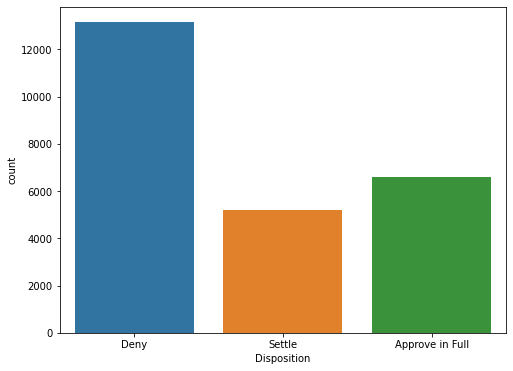

In [28]:
# plotting frequency graph for 'Disposition'
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='Disposition')
plt.show()

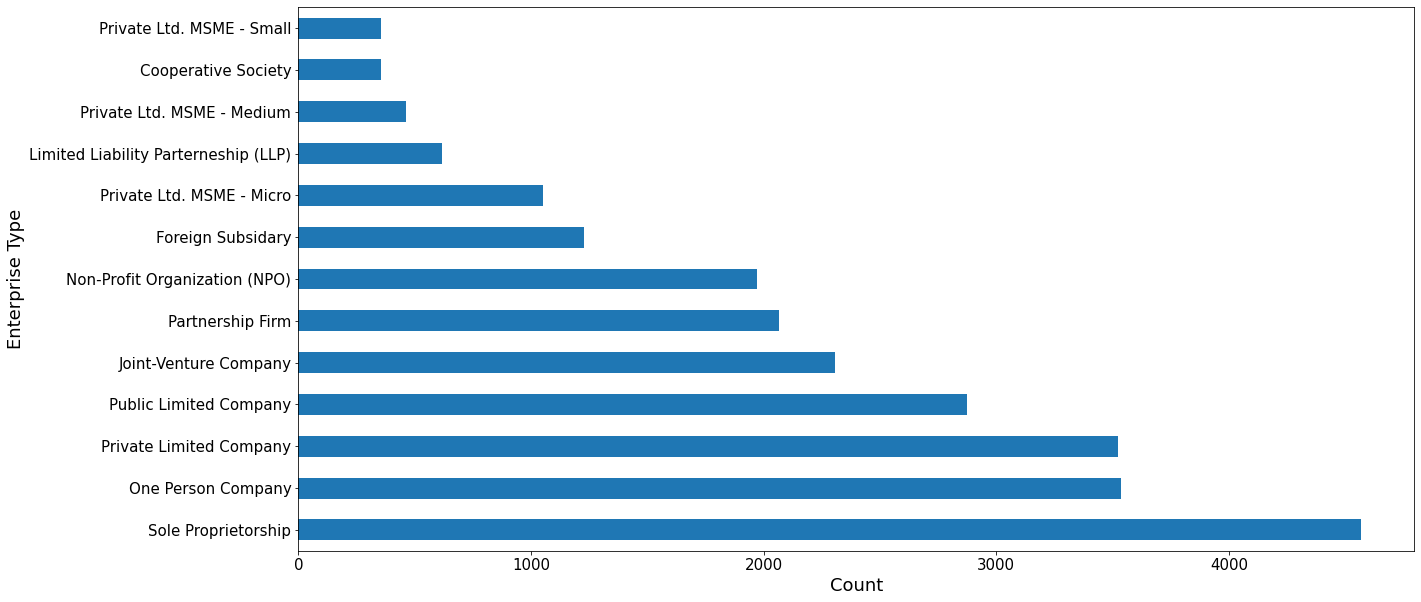

In [29]:
# plotting frequency graph for 'Enterprise Type'
plt.figure(figsize=(20,10))
data.groupby('Enterprise Type')['Enterprise Type'].count().sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Count',fontsize=18)
plt.ylabel('Enterprise Type',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

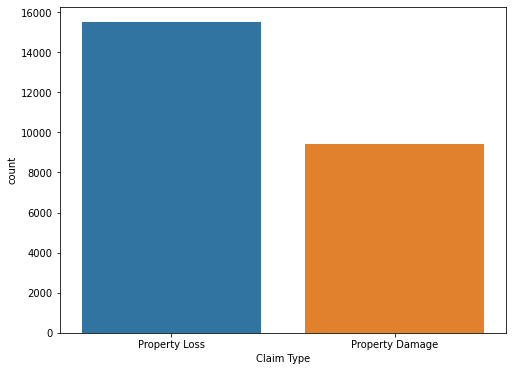

In [30]:
# plotting frequency graph for 'Claim Type'
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='Claim Type')
plt.show()

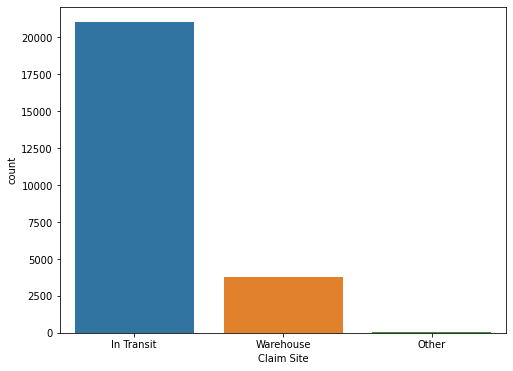

In [31]:
# plotting frequency graph for 'Claim Site'
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='Claim Site')
plt.show()

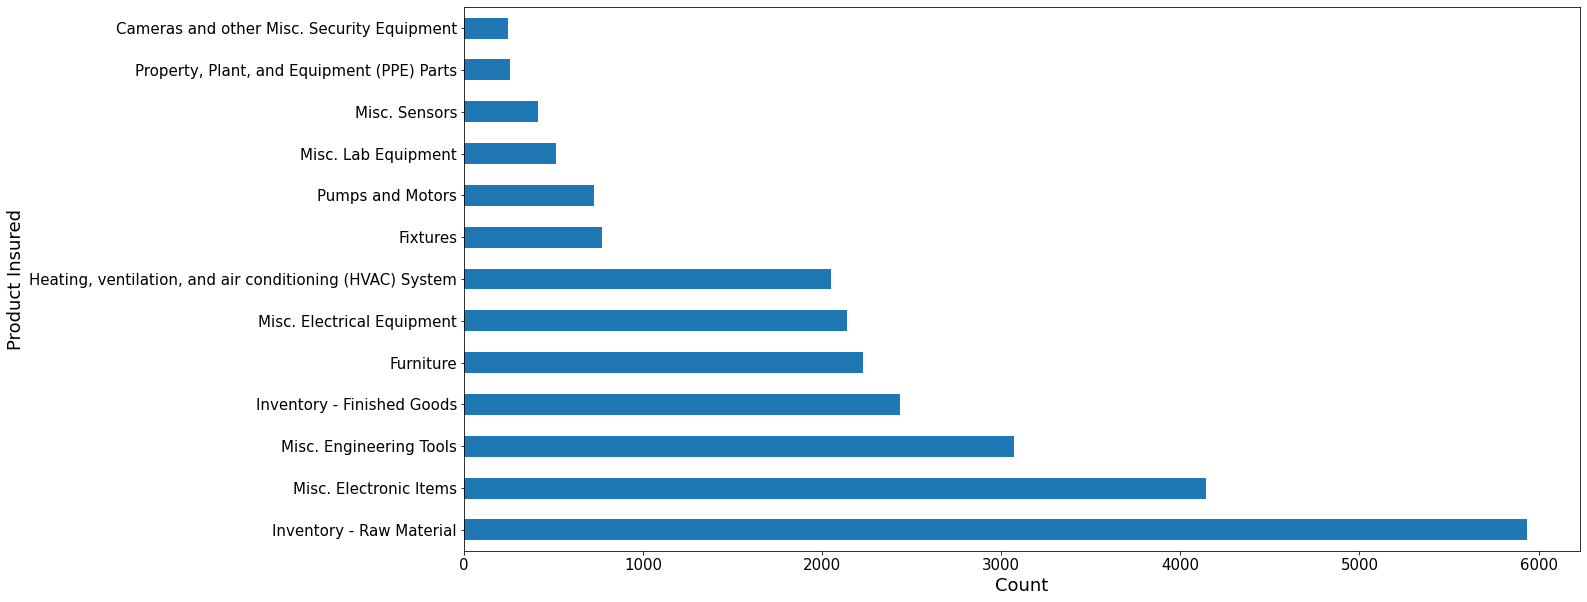

In [32]:
# plotting frequency graph for 'Product Insured'
plt.figure(figsize=(20,10))
data.groupby('Product Insured')['Product Insured'].count().sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Count',fontsize=18)
plt.ylabel('Product Insured',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

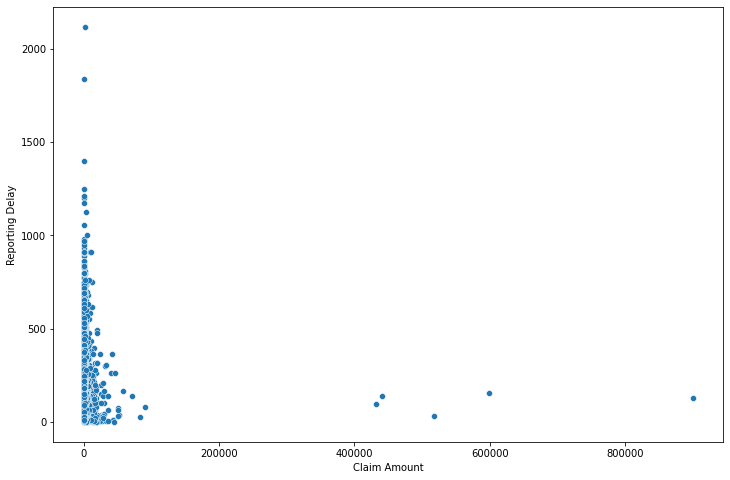

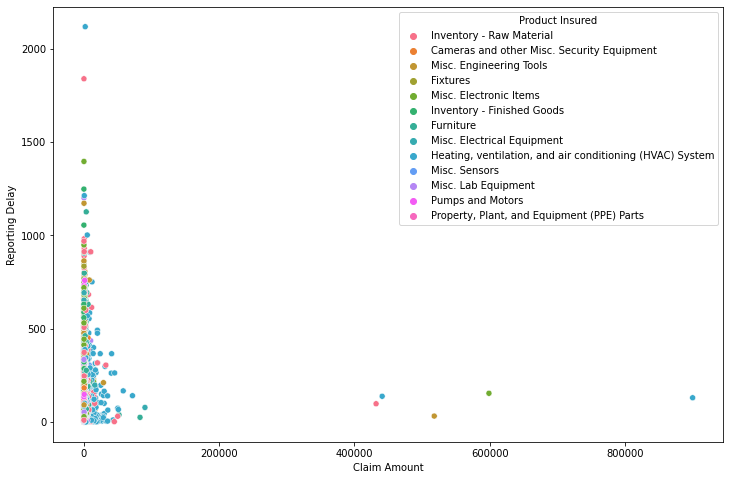

In [33]:
# Do people Report Products with more value earlier compared to Products with less value?
plt.figure(figsize=(12,8))
sns.scatterplot(data=data,x='Claim Amount',y='Reporting Delay')
plt.show()

plt.figure(figsize=(12,8))
sns.scatterplot(data=data,x='Claim Amount',y='Reporting Delay', hue='Product Insured')
plt.show()

> As shown in the above graphs, the products with more value are reported earlier compared to products with less value.

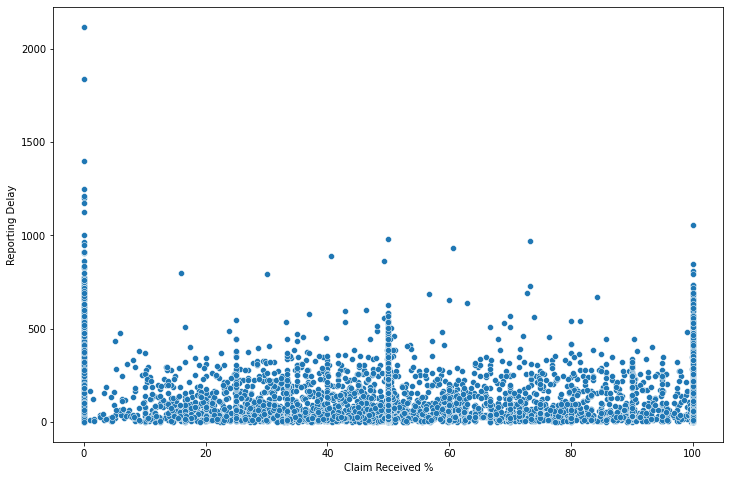

In [34]:
# Find if Delay in reporting affects the Percentage of Claim Received ?
plt.figure(figsize=(12,8))
sns.scatterplot(data=data,x='Claim Received %',y='Reporting Delay')
plt.show()

> From the above graph it is shown that, for claims reporting after 1000 days have no claims i.e. has 0% claim received 

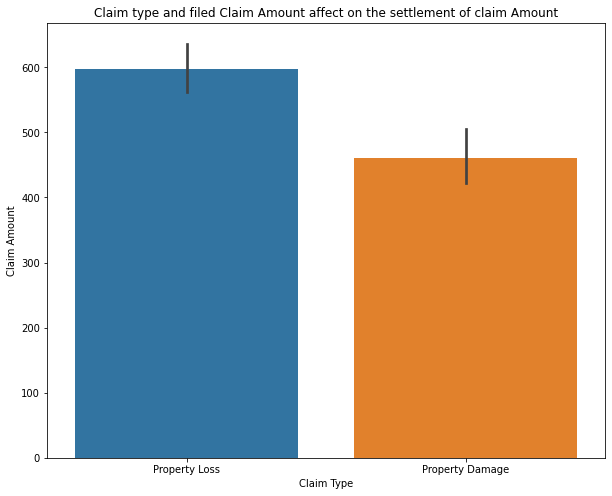

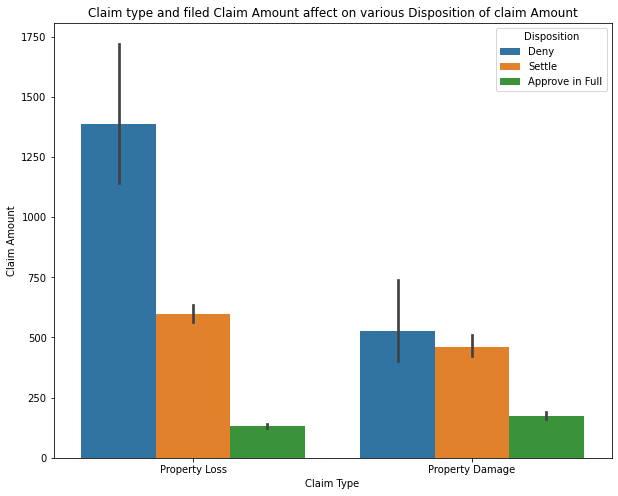

In [35]:
# How claim type and filed Claim Amount could affect the settlement of claim Amount?
plt.figure(figsize=(10,8))
sns.barplot(data=settled, x='Claim Type',y='Claim Amount')
plt.title('Claim type and filed Claim Amount affect on the settlement of claim Amount')
plt.show()

# How claim type and filed Claim Amount could affect various Disposition of claim Amount?
plt.figure(figsize=(10,8))
sns.barplot(data=data, x='Claim Type',y='Claim Amount', hue='Disposition')
plt.title('Claim type and filed Claim Amount affect on various Disposition of claim Amount')
plt.show()

> As shown in the above graphs, more claim amount was filed for property loss compared to poperty damage in settlement 

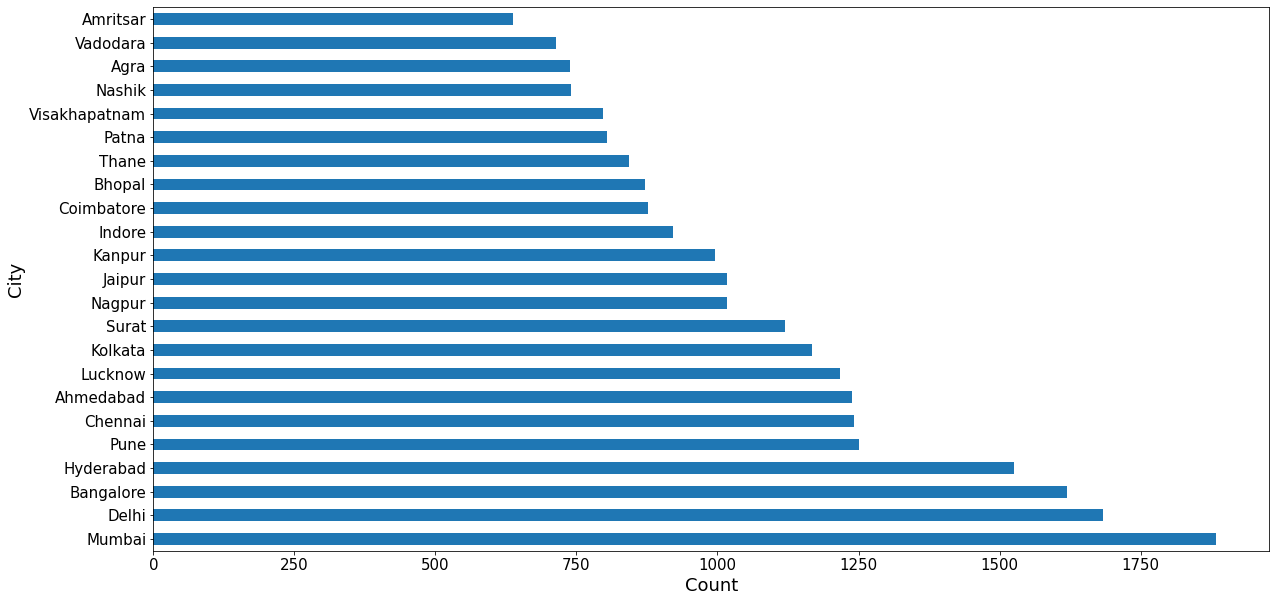

In [36]:
# Which City has reported the highest number of incidents ?
plt.figure(figsize=(20,10))
data.groupby('City')['City'].count().sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Count',fontsize=18)
plt.ylabel('City',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

> As shown in the above graph, **Mumbai** has the highest number of incidents

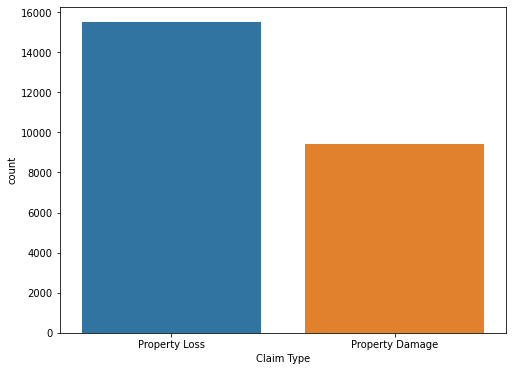

In [37]:
# Which Type of Claims have the highest number of incidents ?
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='Claim Type')
plt.show()

> As shown in the above graph, **Property Loss** has the highest number of incidents

## Pre-processing

In [38]:
data.head()

,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition,Claim Received %,Reporting Delay
0,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-06-07,490.00,0.00,Deny,0.0,13
1,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle,50.0,10
4,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-12-08,83.46,41.73,Settle,50.0,133
5,Chennai,Private Limited Company,Property Loss,In Transit,Misc. Engineering Tools,2004-09-21,2004-11-16,52.49,52.49,Approve in Full,100.0,56
6,Vadodara,Joint-Venture Company,Property Damage,In Transit,Inventory - Raw Material,2005-05-18,2005-07-06,24.50,0.00,Deny,0.0,49


In [39]:
# 'Reporting Delay' can be used instead of (Incident Date, Date Received)
# dropping 'Incident Date' and 'Date Received'
data.drop(['Incident Date','Date Received'],axis=1,inplace=True)
data.shape

(24920, 10)

In [40]:
# Claim Amount, Close Amount, Claim Received % are not necessary for the training
# dropping the mentioned columns
data.drop(['Claim Amount', 'Close Amount', 'Claim Received %'], axis=1, inplace=True)
print(data.shape)
data.head()

(24920, 7)


,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Disposition,Reporting Delay
0,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,Deny,13
1,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,Settle,10
4,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,Settle,133
5,Chennai,Private Limited Company,Property Loss,In Transit,Misc. Engineering Tools,Approve in Full,56
6,Vadodara,Joint-Venture Company,Property Damage,In Transit,Inventory - Raw Material,Deny,49


In [41]:
# similarly for test data
print('Before:',test.shape)

test['Incident Date'] = pd.to_datetime(test['Incident Date'])
test['Date Received'] = pd.to_datetime(test['Date Received'])
test = test[(test['Incident Date'] >= '2002-01-01') & (test['Incident Date'] <= '2009-12-31')]
test = test[(test['Date Received'] >= '2002-01-01') & (test['Date Received'] <= '2009-12-31')]
test = test[test['Incident Date'] <= test['Date Received']]
test['Reporting Delay'] = (test['Date Received'] - test['Incident Date']).dt.days

print('After:',test.shape)

Before: (3791, 7)
After: (2719, 8)


In [42]:
test.head()

,Incident Date,Date Received,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Reporting Delay
0,2006-09-21,2006-12-26,Pune,One Person Company,Property Loss,In Transit,Inventory - Finished Goods,96
1,2009-01-15,2009-11-02,Pune,Limited Liability Parterneship (LLP),Property Loss,In Transit,Fixtures,291
5,2003-11-09,2004-01-20,Kolkata,Private Limited Company,Property Damage,In Transit,Misc. Engineering Tools,72
7,2005-03-14,2005-04-19,Kanpur,Foreign Subsidary,Property Loss,In Transit,Misc. Engineering Tools,36
8,2008-12-26,2009-07-01,Mumbai,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools,187


In [43]:
# 'Reporting Delay' can be used instead of (Incident Date, Date Received)
# dropping 'Incident Date' and 'Date Received'
test.drop(['Incident Date','Date Received'],axis=1,inplace=True)
print(test.shape)
test.head()

(2719, 6)


,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Reporting Delay
0,Pune,One Person Company,Property Loss,In Transit,Inventory - Finished Goods,96
1,Pune,Limited Liability Parterneship (LLP),Property Loss,In Transit,Fixtures,291
5,Kolkata,Private Limited Company,Property Damage,In Transit,Misc. Engineering Tools,72
7,Kanpur,Foreign Subsidary,Property Loss,In Transit,Misc. Engineering Tools,36
8,Mumbai,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools,187


In [44]:
# selecting categorical columns
cat_col = list(data.select_dtypes(include='object').columns)
cat_col

['City',
 'Enterprise Type',
 'Claim Type',
 'Claim Site',
 'Product Insured',
 'Disposition']

In [45]:
# encoding categorical columns using LabelEncoder
label = LabelEncoder()

for i in cat_col:
    data[i] = label.fit_transform(data[i])

In [46]:
# data after encoding
data.head()

,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Disposition,Reporting Delay
0,16,11,1,0,5,1,13
1,14,5,1,0,0,2,10
4,7,5,1,0,8,2,133
5,5,7,1,0,8,0,56
6,21,2,0,0,5,1,49


In [47]:
# similarly for test data
cat_col_test = list(test.select_dtypes(include='object').columns)

for i in cat_col_test:
    test[i] = label.fit_transform(test[i])

In [48]:
test.head()

,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Reporting Delay
0,18,5,1,0,4,96
1,18,3,1,0,1,291
5,12,7,0,0,8,72
7,11,1,1,0,8,36
8,14,11,1,0,8,187


## Modelling

In [49]:
# spittling the data into dependent and independent columns
x = data.drop('Disposition',axis=1)
y = data['Disposition']

In [50]:
# splitting the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=111, stratify=y, test_size=0.25)

In [51]:
x_train.shape, x_test.shape

((18690, 6), (6230, 6))

In [52]:
y_train.value_counts(normalize=True) *100 , y_test.value_counts() * 100 / y_test.count()

(1    52.760835
 0    26.393793
 2    20.845372
 Name: Disposition, dtype: float64,
 1    52.760835
 0    26.404494
 2    20.834671
 Name: Disposition, dtype: float64)

- 0: Approved in Full
- 1: Deny
- 2: Settle

### Logistic Regression

In [53]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(x_train, y_train)

print('Train Accuracy: {}%'.format(round(lr.score(x_train, y_train)*100,2)))
print("Test Accuracy: {}%".format(round(lr.score(x_test, y_test)*100,2)))
print()

y_pred_lr = lr.predict(x_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Train Accuracy: 53.65%
Test Accuracy: 53.6%

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.47      0.09      0.15      1645
           1       0.54      0.97      0.69      3287
           2       0.00      0.00      0.00      1298

    accuracy                           0.54      6230
   macro avg       0.34      0.35      0.28      6230
weighted avg       0.41      0.54      0.41      6230



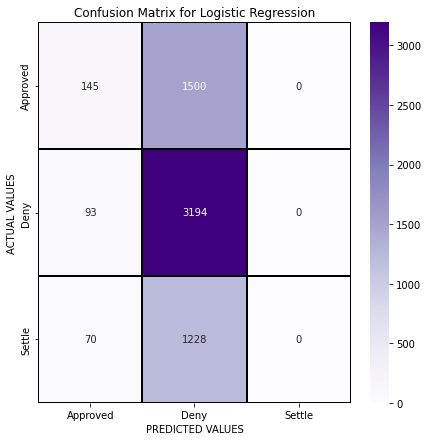

In [54]:
cm = confusion_matrix(y_test,y_pred_lr)
x_axis_labels = ['Approved','Deny','Settle']
y_axis_labels = ['Approved','Deny','Settle']
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUES")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [55]:
lr1 = LogisticRegression(multi_class='ovr', solver='liblinear')
lr1.fit(x_train, y_train)

print('Train Accuracy: {}%'.format(round(lr1.score(x_train, y_train)*100,2)))
print("Test Accuracy: {}%".format(round(lr1.score(x_test, y_test)*100,2)))
print()

y_pred_lr1 = lr1.predict(x_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr1))

Train Accuracy: 53.35%
Test Accuracy: 52.95%

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.43      0.04      0.08      1645
           1       0.53      0.98      0.69      3287
           2       0.00      0.00      0.00      1298

    accuracy                           0.53      6230
   macro avg       0.32      0.34      0.26      6230
weighted avg       0.39      0.53      0.38      6230



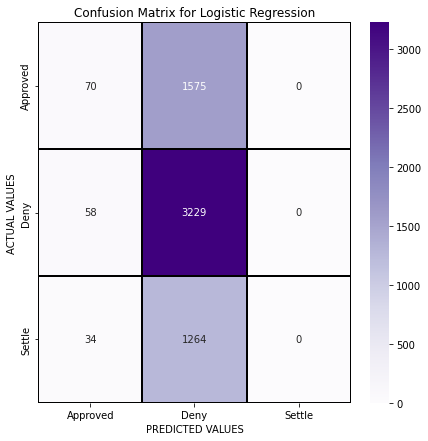

In [56]:
cm = confusion_matrix(y_test,y_pred_lr1)
x_axis_labels = ['Approved','Deny','Settle']
y_axis_labels = ['Approved','Deny','Settle']
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUES")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### Gaussian Naive Bayes

In [57]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)


y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

print('train accuracy is:',metrics.accuracy_score(y_train,y_pred_train)*100)
print('test accuracy is:',metrics.accuracy_score(y_test,y_pred_test)*100)   
print()

y_pred_nb = gnb.predict(x_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))

train accuracy is: 51.701444622792934
test accuracy is: 51.300160513643654

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.36      0.19      0.25      1645
           1       0.54      0.88      0.67      3287
           2       0.00      0.00      0.00      1298

    accuracy                           0.51      6230
   macro avg       0.30      0.36      0.31      6230
weighted avg       0.38      0.51      0.42      6230



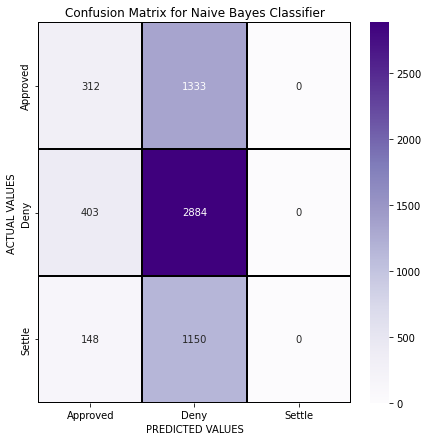

In [58]:
cm = confusion_matrix(y_test,y_pred_nb)
x_axis_labels = ['Approved','Deny','Settle']
y_axis_labels = ['Approved','Deny','Settle']
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUES")
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

### Multinomial Naive Bayes

In [59]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)


mnb_pred_train = mnb.predict(x_train)
mnb_pred_test = mnb.predict(x_test)

print('train accuracy is:',metrics.accuracy_score(y_train,mnb_pred_train)*100)
print('test accuracy is:',metrics.accuracy_score(y_test,mnb_pred_test)*100)     
print()

y_pred_mnb = mnb.predict(x_test)
print("Multinomial Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_mnb))

train accuracy is: 50.92027822364901
test accuracy is: 50.674157303370784

Multinomial Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.32      0.16      0.22      1645
           1       0.54      0.88      0.67      3287
           2       0.00      0.00      0.00      1298

    accuracy                           0.51      6230
   macro avg       0.29      0.35      0.29      6230
weighted avg       0.37      0.51      0.41      6230



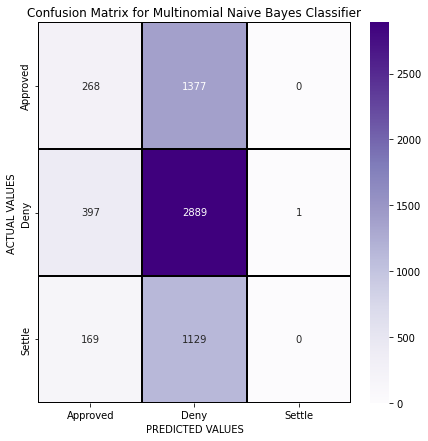

In [60]:
cm = confusion_matrix(y_test,y_pred_mnb)
x_axis_labels = ['Approved','Deny','Settle']
y_axis_labels = ['Approved','Deny','Settle']
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUES")
plt.title('Confusion Matrix for Multinomial Naive Bayes Classifier')
plt.show()

### Bernoulli Naive Bayes

In [61]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)


bnb_pred_train = bnb.predict(x_train)
bnb_pred_test = bnb.predict(x_test)

print('train accuracy is:',metrics.accuracy_score(y_train,bnb_pred_train))
print('test accuracy is:',metrics.accuracy_score(y_test,bnb_pred_test))     

print()

y_pred_bnb = bnb.predict(x_test)
print("Bernoulli Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_bnb))

train accuracy is: 0.5283574103798823
test accuracy is: 0.52776886035313

Bernoulli Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.46      0.00      0.01      1645
           1       0.53      1.00      0.69      3287
           2       0.00      0.00      0.00      1298

    accuracy                           0.53      6230
   macro avg       0.33      0.33      0.23      6230
weighted avg       0.40      0.53      0.37      6230



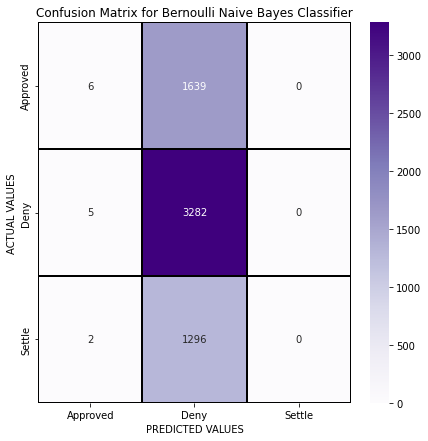

In [62]:
cm = confusion_matrix(y_test,y_pred_bnb)
x_axis_labels = ['Approved','Deny','Settle']
y_axis_labels = ['Approved','Deny','Settle']
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUES")
plt.title('Confusion Matrix for Bernoulli Naive Bayes Classifier')
plt.show()

### Decision Tree

In [63]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

print('Train Accuracy: {}%'.format(round(dt.score(x_train, y_train)*100,2)))
print("Test Accuracy: {}%".format(round(dt.score(x_test, y_test)*100,2)))
print()

y_pred_dt = dt.predict(x_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))

Train Accuracy: 96.78%
Test Accuracy: 42.91%

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.33      0.36      0.35      1645
           1       0.56      0.54      0.55      3287
           2       0.24      0.24      0.24      1298

    accuracy                           0.43      6230
   macro avg       0.38      0.38      0.38      6230
weighted avg       0.43      0.43      0.43      6230



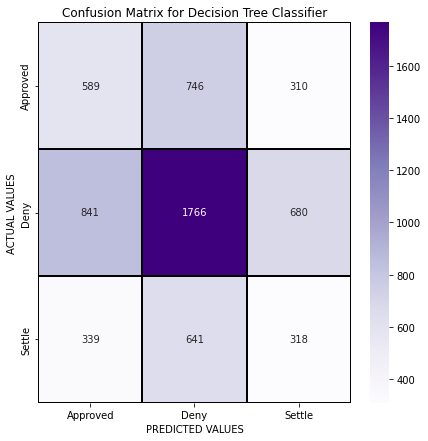

In [64]:
cm = confusion_matrix(y_test,y_pred_dt)
x_axis_labels = ['Approved','Deny','Settle']
y_axis_labels = ['Approved','Deny','Settle']
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUES")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

### Random Forest Classifier

In [65]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

print('Train Accuracy: {}%'.format(round(rfc.score(x_train, y_train)*100,2)))
print("Test Accuracy: {}%".format(round(rfc.score(x_test, y_test)*100,2)))
print()

y_pred_rfc = rfc.predict(x_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rfc))

Train Accuracy: 96.78%
Test Accuracy: 47.22%

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       0.37      0.34      0.36      1645
           1       0.57      0.65      0.61      3287
           2       0.25      0.19      0.22      1298

    accuracy                           0.47      6230
   macro avg       0.40      0.39      0.39      6230
weighted avg       0.45      0.47      0.46      6230



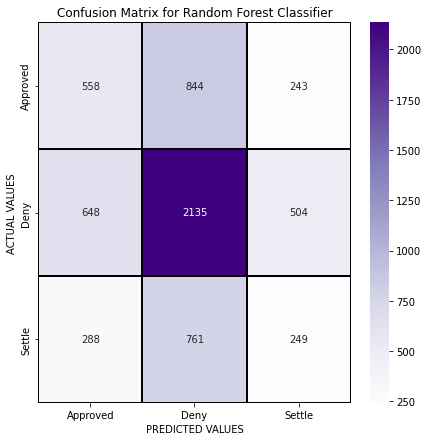

In [66]:
cm = confusion_matrix(y_test,y_pred_rfc)
x_axis_labels = ['Approved','Deny','Settle']
y_axis_labels = ['Approved','Deny','Settle']
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUES")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

### AdaBoost Classifier

In [67]:
abc = AdaBoostClassifier()
abc.fit(x_train, y_train)

print('Train Accuracy: {}%'.format(round(abc.score(x_train, y_train)*100,2)))
print("Test Accuracy: {}%".format(round(abc.score(x_test, y_test)*100,2)))
print()

y_pred_abc = abc.predict(x_test)
print("AdaBoost Classifier report: \n\n", classification_report(y_test, y_pred_abc))

Train Accuracy: 52.49%
Test Accuracy: 52.2%

AdaBoost Classifier report: 

               precision    recall  f1-score   support

           0       0.40      0.16      0.23      1645
           1       0.54      0.91      0.67      3287
           2       0.00      0.00      0.00      1298

    accuracy                           0.52      6230
   macro avg       0.31      0.36      0.30      6230
weighted avg       0.39      0.52      0.42      6230



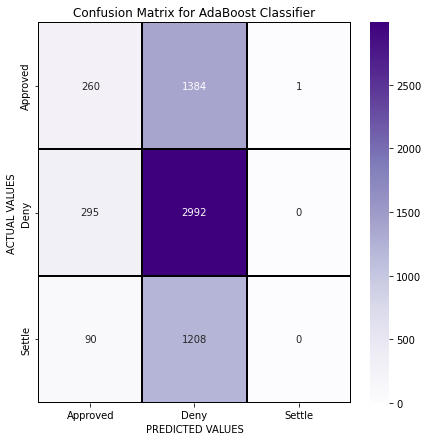

In [68]:
cm = confusion_matrix(y_test,y_pred_abc)
x_axis_labels = ['Approved','Deny','Settle']
y_axis_labels = ['Approved','Deny','Settle']
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUES")
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()

### Gradient Boost Classifier

In [69]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

print('Train Accuracy: {}%'.format(round(gbc.score(x_train, y_train)*100,2)))
print("Test Accuracy: {}%".format(round(gbc.score(x_test, y_test)*100,2)))
print()

y_pred_gbc = gbc.predict(x_test)
print("AdaBoost Classifier report: \n\n", classification_report(y_test, y_pred_gbc))

Train Accuracy: 54.84%
Test Accuracy: 53.96%

AdaBoost Classifier report: 

               precision    recall  f1-score   support

           0       0.48      0.15      0.23      1645
           1       0.55      0.94      0.69      3287
           2       0.45      0.01      0.02      1298

    accuracy                           0.54      6230
   macro avg       0.49      0.37      0.31      6230
weighted avg       0.51      0.54      0.43      6230



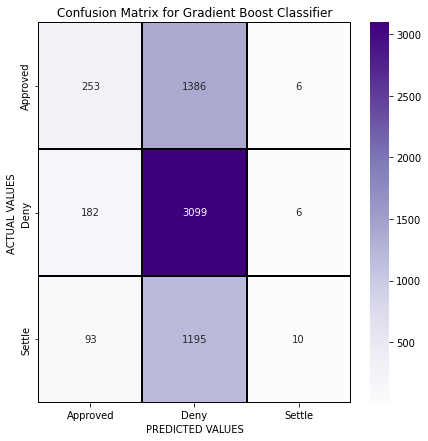

In [70]:
cm = confusion_matrix(y_test,y_pred_gbc)
x_axis_labels = ['Approved','Deny','Settle']
y_axis_labels = ['Approved','Deny','Settle']
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUES")
plt.title('Confusion Matrix for Gradient Boost Classifier')
plt.show()

Accuracy
- **Logistic Regression(Multinomial)**  :      53.6 %
- **Logistic Regression(OVR)**          :      52.95 %
- **Gaussian Naive Bayes**              :      51.3 %
- **Multinomial Naive Bayes**           :      50.6 %
- **Bernoulli Naive Bayes**             :      52.77 %
- **Decision Tree Classifier**          :      43.08 %
- **Random Forest Classifier**          :      47.24 %
- **AdaBoost Classifier**               :      52.2 %
- **Gradient Boost Classifier**         :      53.96 %

From the above confusion matrices it is clear that recall is important i.e. we need to reduce False-Positive value.
Why Recall? Because Even though it says the insurance claim is denied, it is predicting it as approved or settled, this is not good for business.


Recall
- **Logistic Regression(Multinomial)**  :      0.97
- **Logistic Regression(OVR)**          :      0.98
- **Gaussian Naive Bayes**              :      0.88
- **Multinomial Naive Bayes**           :      0.88
- **Bernoulli Naive Bayes**             :      1.00
- **Decision Tree Classifier**          :      0.54
- **Random Forest Classifier**          :      0.65
- **AdaBoost Classifier**               :      0.91
- **Gradient Boost Classifier**         :      0.94

From the above accuracy and recall: Logistic Regression(Multinomial), Logistic Regression(OVR) and Gradient Boost Classifier models have better accuracy and recall for the given problem classification.
Since Bernoulli Naive Bayes is used for binary classification and since this is a three classification problem, no need to consider its accuracy and recall.

Further hyperparameter tuning can be done for the above models. Also taking Random Forest Classifier.

### Logistic Regression hyperparamter tuning

In [77]:
param_grid = {'penalty': ['l1','l2'],
     'solver': ['newton-cg','liblinear','lbfgs'],
     'multi_class': ['multinomial','ovr']
    }

In [78]:
clf_lr = GridSearchCV(lr, param_grid= param_grid, cv= 3)

In [73]:
# clf_lr.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'multi_class': ['multinomial', 'ovr'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'liblinear', 'lbfgs']})

In [74]:
# clf_lr.best_params_

{'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}

In [71]:
lr_1 = LogisticRegression(multi_class='multinomial', penalty= 'l2', solver= 'lbfgs')
lr_1.fit(x_train, y_train)

print('Train Accuracy: {}%'.format(round(lr_1.score(x_train, y_train)*100,2)))
print("Test Accuracy: {}%".format(round(lr_1.score(x_test, y_test)*100,2)))
print()

y_pred_lr_1 = lr_1.predict(x_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr_1))

Train Accuracy: 53.65%
Test Accuracy: 53.6%

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.47      0.09      0.15      1645
           1       0.54      0.97      0.69      3287
           2       0.00      0.00      0.00      1298

    accuracy                           0.54      6230
   macro avg       0.34      0.35      0.28      6230
weighted avg       0.41      0.54      0.41      6230



### Random Forest Classifier hyperparameter tuning

In [80]:
param_grid = {"n_estimators" : [50, 100],
              "max_depth" : [1,5],
              "max_features" : [3, 5],
              "min_samples_leaf" : [1, 2, 4]}

In [81]:
clf_rfc = GridSearchCV(rfc, param_grid, cv=2)

In [86]:
# clf_rfc.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5], 'max_features': [3, 5],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100]})

In [87]:
# clf_rfc.best_params_

{'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 1, 'n_estimators': 100}

In [72]:
rfc1 = RandomForestClassifier(max_depth=5, max_features=5, min_samples_leaf=1, n_estimators=100)
rfc1.fit(x_train, y_train)

print('Train Accuracy: {}%'.format(round(rfc1.score(x_train, y_train)*100,2)))
print("Test Accuracy: {}%".format(round(rfc1.score(x_test, y_test)*100,2)))
print()

y_pred_rfc1 = rfc1.predict(x_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rfc1))

Train Accuracy: 55.49%
Test Accuracy: 55.02%

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       0.54      0.25      0.34      1645
           1       0.55      0.91      0.69      3287
           2       0.47      0.01      0.01      1298

    accuracy                           0.55      6230
   macro avg       0.52      0.39      0.35      6230
weighted avg       0.53      0.55      0.46      6230



### Gradient Boost Classifier hyperparameter tuning

In [83]:
param_grid = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.01, 0.1, 1.0],
              'max_depth': [3, 5, 7],
              'min_samples_split': [2, 5, 10]}

In [84]:
clf_gbc = GridSearchCV(gbc, param_grid, cv=5)

In [91]:
# clf_gbc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [92]:
# clf_gbc.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 200}

In [73]:
gbc1 = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=200)
gbc1.fit(x_train, y_train)

print('Train Accuracy: {}%'.format(round(gbc1.score(x_train, y_train)*100,2)))
print("Test Accuracy: {}%".format(round(gbc1.score(x_test, y_test)*100,2)))
print()

y_pred_gbc1 = gbc1.predict(x_test)
print("AdaBoost Classifier report: \n\n", classification_report(y_test, y_pred_gbc1))

Train Accuracy: 55.55%
Test Accuracy: 54.86%

AdaBoost Classifier report: 

               precision    recall  f1-score   support

           0       0.54      0.22      0.32      1645
           1       0.55      0.93      0.69      3287
           2       0.46      0.00      0.01      1298

    accuracy                           0.55      6230
   macro avg       0.52      0.38      0.34      6230
weighted avg       0.53      0.55      0.45      6230



### After hyperparameter tuning
Accuracy
- **Logistic Regression**               :      53.6 %
- **Random Forest Classifier**          :      55.02 %
- **Gradient Boost Classifier**         :      54.86 %

From the above confusion matrices it is clear that recall is important i.e. we need to reduce False-Positive value.
Why Recall? Because Even though it says the insurance claim is denied, it is predicting it as approved or settled, this is not good for business.


Recall
- **Logistic Regression**               :      0.97
- **Random Forest Classifier**          :      0.91
- **Gradient Boost Classifier**         :      0.93

After hyperparameter tuning of the above models, **Gradient Boosting Classifier** model has the best overall metrics.


In [74]:
# prediction using the unseen test data
predictions = gbc1.predict(test)
predictions

array([0, 1, 1, ..., 0, 1, 1])

In [75]:
final_predictions = test.copy()
final_predictions['Predictions'] = predictions

In [76]:
final_predictions

,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Reporting Delay,Predictions
0,18,5,1,0,4,96,0
1,18,3,1,0,1,291,1
5,12,7,0,0,8,72,1
7,11,1,1,0,8,36,1
8,14,11,1,0,8,187,1
...,...,...,...,...,...,...,...
3783,19,4,1,0,8,16,1
3784,10,9,1,0,8,25,1
3785,4,11,1,0,4,56,0
3786,12,7,1,2,0,22,1


- 0: Approved
- 1: Deny
- 2: Settle

In [77]:
pred = []
for i in predictions:
    if i==0:
        pred.append('Approved in Full')
    elif i==1:
        pred.append('Deny')
    else:
        pred.append('Settle')

In [78]:
pred[:5]

['Approved in Full', 'Deny', 'Deny', 'Deny', 'Deny']

In [79]:
test1 = pd.read_csv('test_data.csv')

In [80]:
test1['Incident Date'] = pd.to_datetime(test1['Incident Date'])
test1['Date Received'] = pd.to_datetime(test1['Date Received'])
test1 = test1[(test1['Incident Date'] >= '2002-01-01') & (test1['Incident Date'] <= '2009-12-31')]
test1 = test1[(test1['Date Received'] >= '2002-01-01') & (test1['Date Received'] <= '2009-12-31')]
test1 = test1[test1['Incident Date'] <= test1['Date Received']]
test1['Reporting Delay'] = (test1['Date Received'] - test1['Incident Date']).dt.days

In [81]:
test1

,Claim Number,Incident Date,Date Received,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Reporting Delay
0,6EYB31JGFR,2006-09-21,2006-12-26,PNQ,Pune,One Person Company,Property Loss,In Transit,Inventory - Finished Goods,96
1,HJLRXONE3R,2009-01-15,2009-11-02,PNQ,Pune,Limited Liability Parterneship (LLP),Property Loss,In Transit,Fixtures,291
5,20UXJ7Z5HQ,2003-11-09,2004-01-20,CCU,Kolkata,Private Limited Company,Property Damage,In Transit,Misc. Engineering Tools,72
7,Y43BP6HD3O,2005-03-14,2005-04-19,KNU,Kanpur,Foreign Subsidary,Property Loss,In Transit,Misc. Engineering Tools,36
8,OL4T3DPBEN,2008-12-26,2009-07-01,BOM,Mumbai,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools,187
...,...,...,...,...,...,...,...,...,...,...
3783,V4BF1PX1YQ,2005-06-05,2005-06-21,STV,Surat,Non-Profit Organization (NPO),Property Loss,In Transit,Misc. Engineering Tools,16
3784,BOY8E14NRB,2005-09-26,2005-10-21,JAI,Jaipur,Private Ltd. MSME - Micro,Property Loss,In Transit,Misc. Engineering Tools,25
3785,DIWWILJPSI,2009-06-23,2009-08-18,BHO,Bhopal,Public Limited Company,Property Loss,In Transit,Inventory - Finished Goods,56
3786,IMQYY73AOP,2007-07-30,2007-08-21,CCU,Kolkata,Private Limited Company,Property Loss,Warehouse,Cameras and other Misc. Security Equipment,22


In [82]:
test1['Predictions'] = pred

In [83]:
test1

,Claim Number,Incident Date,Date Received,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Reporting Delay,Predictions
0,6EYB31JGFR,2006-09-21,2006-12-26,PNQ,Pune,One Person Company,Property Loss,In Transit,Inventory - Finished Goods,96,Approved in Full
1,HJLRXONE3R,2009-01-15,2009-11-02,PNQ,Pune,Limited Liability Parterneship (LLP),Property Loss,In Transit,Fixtures,291,Deny
5,20UXJ7Z5HQ,2003-11-09,2004-01-20,CCU,Kolkata,Private Limited Company,Property Damage,In Transit,Misc. Engineering Tools,72,Deny
7,Y43BP6HD3O,2005-03-14,2005-04-19,KNU,Kanpur,Foreign Subsidary,Property Loss,In Transit,Misc. Engineering Tools,36,Deny
8,OL4T3DPBEN,2008-12-26,2009-07-01,BOM,Mumbai,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools,187,Deny
...,...,...,...,...,...,...,...,...,...,...,...
3783,V4BF1PX1YQ,2005-06-05,2005-06-21,STV,Surat,Non-Profit Organization (NPO),Property Loss,In Transit,Misc. Engineering Tools,16,Deny
3784,BOY8E14NRB,2005-09-26,2005-10-21,JAI,Jaipur,Private Ltd. MSME - Micro,Property Loss,In Transit,Misc. Engineering Tools,25,Deny
3785,DIWWILJPSI,2009-06-23,2009-08-18,BHO,Bhopal,Public Limited Company,Property Loss,In Transit,Inventory - Finished Goods,56,Approved in Full
3786,IMQYY73AOP,2007-07-30,2007-08-21,CCU,Kolkata,Private Limited Company,Property Loss,Warehouse,Cameras and other Misc. Security Equipment,22,Deny


In [84]:
test1['Predictions'].value_counts(normalize=True) *100

Deny                88.230967
Approved in Full    11.658698
Settle               0.110335
Name: Predictions, dtype: float64

> In overall predictions for unseen data, 
>> **Deny** was the most predicted value with **88.23%** <br>
>> **Approved in Full 11.65%** <br>
>> **Settle 0.11%**

In [85]:
test1.to_csv('Final_Predictions.csv', index=False)